<a href="https://colab.research.google.com/github/micahks/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [2]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-09-02 21:42:59--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.1.166
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.1.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’

instacart_online_gr 100%[===================>] 196.03M  42.1MB/s    in 5.0s    

2020-09-02 21:43:04 (38.8 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’ saved [205548478/205548478]



In [3]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [1]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [2]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [3]:
##### YOUR CODE HERE #####

import pandas as pd

In [4]:
order_products__prior = pd.read_csv('order_products__prior.csv')


In [5]:
order_products__train = pd.read_csv('order_products__train.csv')


In [6]:
orders = pd.read_csv('orders.csv')


In [7]:
products = pd.read_csv('products.csv')


In [8]:
order_products = pd.concat([order_products__prior, order_products__train])

order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [12]:
order_products_and_products = pd.merge(order_products, products, how='inner', on='product_id')

order_products_and_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,26,33120,5,0,Organic Egg Whites,86,16
2,120,33120,13,0,Organic Egg Whites,86,16
3,327,33120,5,1,Organic Egg Whites,86,16
4,390,33120,28,1,Organic Egg Whites,86,16


In [16]:
top10 = order_products_and_products['product_name'].value_counts().head(10).rename_axis(['product']).reset_index()

top10 = top10.rename(columns = {'product':'product_name', 'product_name':'count'})

top10

,product_name,count
0,Banana,491291
1,Bag of Organic Bananas,394930
2,Organic Strawberries,275577
3,Organic Baby Spinach,251705
4,Organic Hass Avocado,220877
5,Organic Avocado,184224
6,Large Lemon,160792
7,Strawberries,149445
8,Limes,146660
9,Organic Whole Milk,142813


## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [16]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [17]:
#table1 -> tidy

In [18]:
table1 = table1.reset_index()

table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [19]:
tidy = table1.melt(id_vars='index', value_vars=['treatmenta', 'treatmentb'])

tidy

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [20]:
tidy1 = tidy.rename(columns={'index': 'name', 'variable': 'trt', 'value': 'result'})

tidy1

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [21]:
tidy1.trt = tidy1.trt.str.replace('treatment', '')

tidy1

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [22]:
wide = tidy1.pivot_table(index='name', columns='trt', values='result')

wide

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [23]:
# table2 -> tidy

In [24]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [25]:
table2 = table2.reset_index()

table2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [26]:
#tidy = table1.melt(id_vars='index', value_vars=['treatmenta', 'treatmentb'])

tidy = table2.melt(id_vars='index', value_vars=['John Smith', 'Jane Doe', 'Mary Johnson'])

tidy

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [27]:
#tidy1 = tidy.rename(columns={'index': 'name', 'variable': 'trt', 'value': 'result'})
#tidy

tidy1 = tidy.rename(columns={'index':'Treatment', 'variable':'Name', 'value':'Result'})

tidy1

,Treatment,Name,Result
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [28]:
tidy1['Treatment'] = tidy1['Treatment'].str.replace('treatment','')

tidy1

,Treatment,Name,Result
0,a,John Smith,NaN
1,b,John Smith,2.0
2,a,Jane Doe,16.0
3,b,Jane Doe,11.0
4,a,Mary Johnson,3.0
5,b,Mary Johnson,1.0


In [29]:
# tidy -> table2

In [30]:
wide = tidy1.pivot(index='Treatment', columns='Name', values= 'Result')

wide

Name,Jane Doe,John Smith,Mary Johnson
Treatment,,,
a,16.0,NaN,3.0
b,11.0,2.0,1.0


In [31]:
import seaborn as sns

flights = sns.load_dataset('flights')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [32]:
# Flights Pivot Table

In [33]:
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [34]:
flights_wide = flights.pivot(index='year', columns='month', values='passengers')

flights_wide

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [35]:
##### YOUR CODE HERE #####

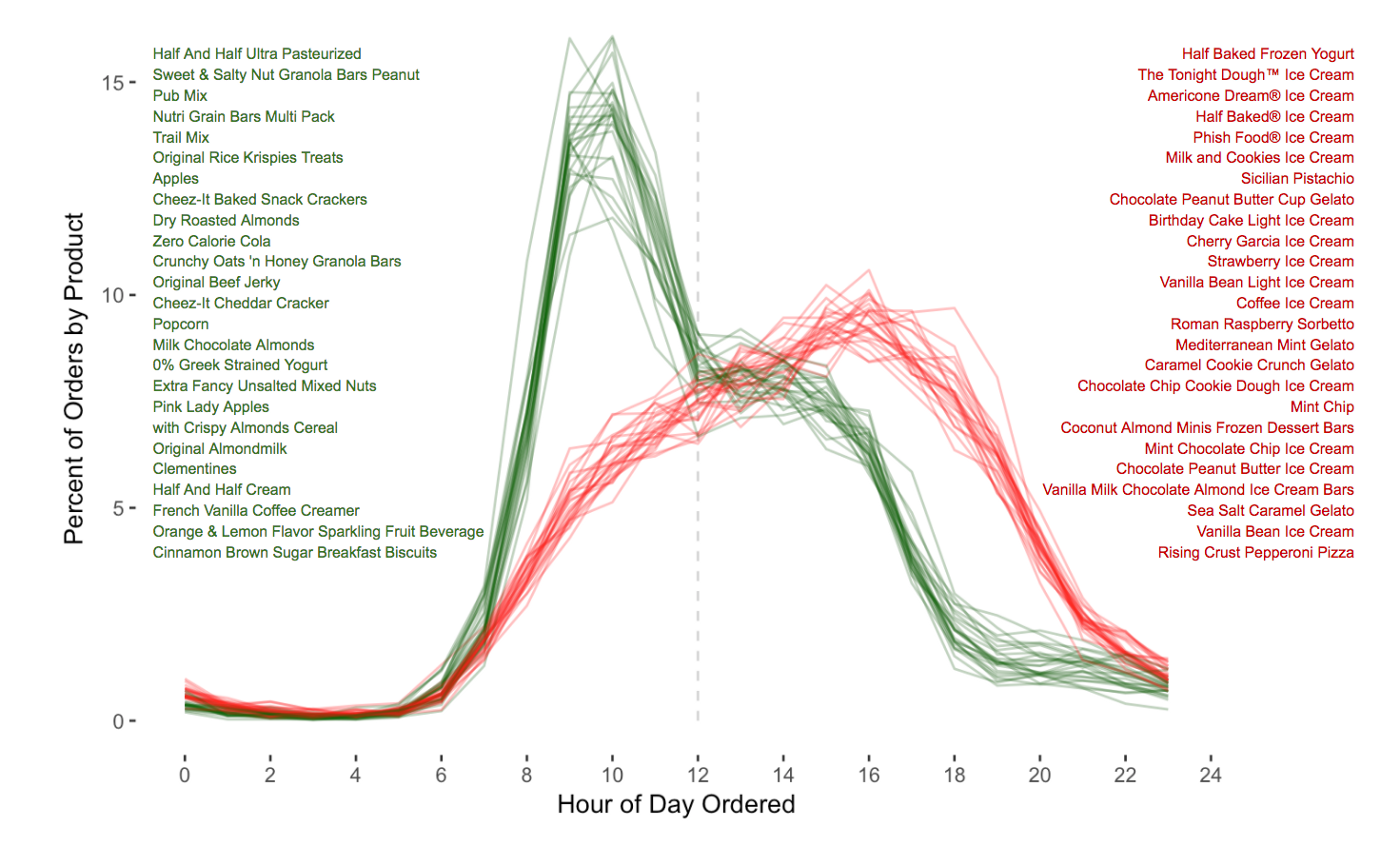

In [9]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [36]:
order_products1 = order_products.drop(columns=['add_to_cart_order', 'reordered'])

print(order_products1.shape)
order_products1.head()

(33819106, 2)


,order_id,product_id
0,2,33120
1,2,28985
2,2,9327
3,2,45918
4,2,30035


In [11]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [37]:
orders1 = orders.drop(columns=['user_id', 'eval_set', 'order_number', 'order_dow', 'days_since_prior_order'])

print(orders1.shape)
orders1.head()

(3421083, 2)


,order_id,order_hour_of_day
0,2539329,8
1,2398795,7
2,473747,12
3,2254736,7
4,431534,15


In [35]:
order_products_hod = pd.merge(order_products1, orders1, how='inner', on='order_id')

In [52]:
late_orders = order_products_hod[(order_products_hod['order_hour_of_day'] >= 16) & (order_products_hod['order_hour_of_day'] <= 20)]

print(late_orders.shape)
late_orders.head()

(8884083, 3)


,order_id,product_id,order_hour_of_day
9,3,33754,17
10,3,24838,17
11,3,17704,17
12,3,21903,17
13,3,17668,17


In [53]:
late_products = pd.merge(late_orders, products, how='inner', on='product_id')


print(late_products.shape)
late_products.head() 

(8884083, 6)


,order_id,product_id,order_hour_of_day,product_name,aisle_id,department_id
0,3,33754,17,Total 2% with Strawberry Lowfat Greek Strained...,120,16
1,342,33754,17,Total 2% with Strawberry Lowfat Greek Strained...,120,16
2,346,33754,18,Total 2% with Strawberry Lowfat Greek Strained...,120,16
3,582,33754,19,Total 2% with Strawberry Lowfat Greek Strained...,120,16
4,1951,33754,17,Total 2% with Strawberry Lowfat Greek Strained...,120,16


In [54]:
top25_16to20 = late_products['product_name'].value_counts().rename_axis(['product']).reset_index()

top25_16to20.columns = ['product_name', '16to20_count']

print(top25_16to20.shape)
top25_16to20.head()

(48230, 2)


,product_name,16to20_count
0,Banana,130810
1,Bag of Organic Bananas,102511
2,Organic Strawberries,72455
3,Organic Baby Spinach,66033
4,Organic Hass Avocado,58937


In [55]:
allorders = pd.merge(order_products_hod, products, how='inner', on='product_id')

allorders.head()

,order_id,product_id,order_hour_of_day,product_name,aisle_id,department_id
0,2,33120,9,Organic Egg Whites,86,16
1,26,33120,16,Organic Egg Whites,86,16
2,120,33120,8,Organic Egg Whites,86,16
3,327,33120,9,Organic Egg Whites,86,16
4,390,33120,12,Organic Egg Whites,86,16


In [56]:
top25_allday = allorders['product_name'].value_counts().rename_axis(['product']).reset_index()

top25_allday.columns = ['product_name', 'allday_count']

top25_allday.head()

,product_name,allday_count
0,Banana,491291
1,Bag of Organic Bananas,394930
2,Organic Strawberries,275577
3,Organic Baby Spinach,251705
4,Organic Hass Avocado,220877


In [57]:
top25_norm = pd.merge(top25_allday, top25_16to20, how='inner', on='product_name')

top25_norm.head()

,product_name,allday_count,16to20_count
0,Banana,491291,130810
1,Bag of Organic Bananas,394930,102511
2,Organic Strawberries,275577,72455
3,Organic Baby Spinach,251705,66033
4,Organic Hass Avocado,220877,58937


In [58]:
top25_norm['count_norm'] = top25_norm['16to20_count']/top25_norm['allday_count']

top25_norm[top25_norm['allday_count'] > 2900].sort_values(by='count_norm', ascending=False ).head(25)

,product_name,allday_count,16to20_count,count_norm
1891,The Tonight Dough™ Ice Cream,3137,1278,0.407396
914,Half Baked® Ice Cream,6222,2379,0.382353
878,Americone Dream® Ice Cream,6447,2442,0.378781
1870,Phish Food® Ice Cream,3177,1202,0.378344
1985,Half Baked Frozen Yogurt,2983,1128,0.378143
1093,Milk and Cookies Ice Cream,5223,1946,0.372583
1300,Cherry Garcia Ice Cream,4495,1656,0.368409
1887,Sicilian Pistachio,3146,1152,0.366179
1501,Coffee Ice Cream,3941,1443,0.366151
1296,Chocolate Peanut Butter Cup Gelato,4511,1633,0.362004


## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [38]:
##### YOUR CODE HERE #####